In [34]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "WMT", "BA", "UBER"]

data = yf.download(tickers, start="2023-01-01", end="2023-07-30")

[*********************100%***********************]  7 of 7 completed


In [13]:
import yfinance as yf


tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "WMT", "BA", "UBER"]
start_date = "2023-07-01"
end_date = "2023-07-30"


stock_data = yf.download(tickers, start=start_date, end=end_date)


print(stock_data.head(10))


stock_data.to_csv('stock_data.csv')

[*********************100%***********************]  7 of 7 completed
             Adj Close                                                  \
                  AAPL        AMZN          BA       GOOGL        MSFT   
Date                                                                     
2023-07-03  192.460007  130.220001  210.919998  119.900002  337.989990   
2023-07-05  191.330002  130.380005  213.309998  121.750000  338.149994   
2023-07-06  191.809998  128.360001  212.619995  120.110001  341.269989   
2023-07-07  190.679993  129.779999  212.100006  119.480003  337.220001   
2023-07-10  188.610001  127.129997  213.309998  116.449997  331.829987   
2023-07-11  188.080002  128.779999  218.759995  117.139999  332.470001   
2023-07-12  189.770004  130.800003  217.110001  118.930000  337.200012   
2023-07-13  190.539993  134.300003  216.850006  124.540001  342.660004   
2023-07-14  190.690002  134.679993  213.119995  125.419998  345.239990   
2023-07-17  193.990005  133.559998  211.869

In [10]:
import yfinance as yf
import pandas as pd
from IPython.display import FileLink


tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "WMT", "BA", "UBER"]
start_date = "2023-07-01"
end_date = "2023-07-30"


stock_data = yf.download(tickers, start=start_date, end=end_date)


stock_data.to_csv('stock_data.csv')


FileLink('stock_data.csv')

[*********************100%***********************]  7 of 7 completed


/Users/swapniel/Untitled Folder/stock_data.csv

In [11]:

data.dropna(inplace=True)


data.index = pd.to_datetime(data.index)

In [12]:

daily_returns = stock_data['Adj Close'].pct_change()


print(daily_returns.head())

                AAPL      AMZN        BA     GOOGL      MSFT      UBER  \
Date                                                                     
2023-07-03       NaN       NaN       NaN       NaN       NaN       NaN   
2023-07-05 -0.005871  0.001229  0.011331  0.015430  0.000473  0.013228   
2023-07-06  0.002509 -0.015493 -0.003235 -0.013470  0.009227 -0.035502   
2023-07-07 -0.005891  0.011063 -0.002446 -0.005245 -0.011867  0.018998   
2023-07-10 -0.010856 -0.020419  0.005705 -0.025360 -0.015984 -0.003030   

                 WMT  
Date                  
2023-07-03       NaN  
2023-07-05 -0.000569  
2023-07-06 -0.006325  
2023-07-07 -0.023041  
2023-07-10  0.009056  


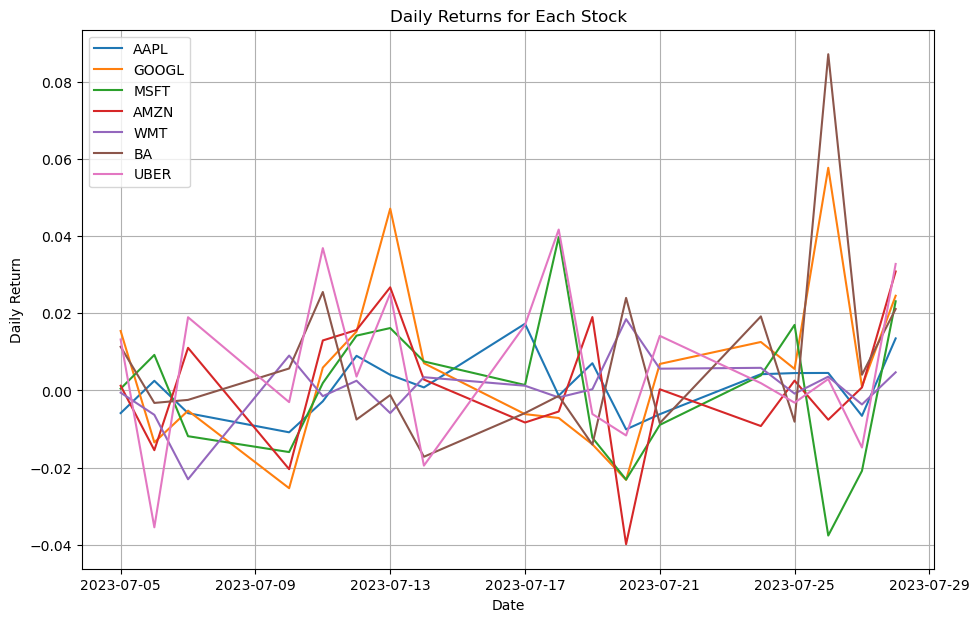

In [14]:

plt.figure(figsize=(11, 7))
for ticker in tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker)

plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Daily Returns for Each Stock")
plt.legend()
plt.grid(True)
plt.show()

In [15]:

average_daily_returns = daily_returns.mean()


print(average_daily_returns)

AAPL     0.000994
AMZN     0.000984
BA       0.007153
GOOGL    0.005820
MSFT     0.000230
UBER     0.006374
WMT      0.000630
dtype: float64


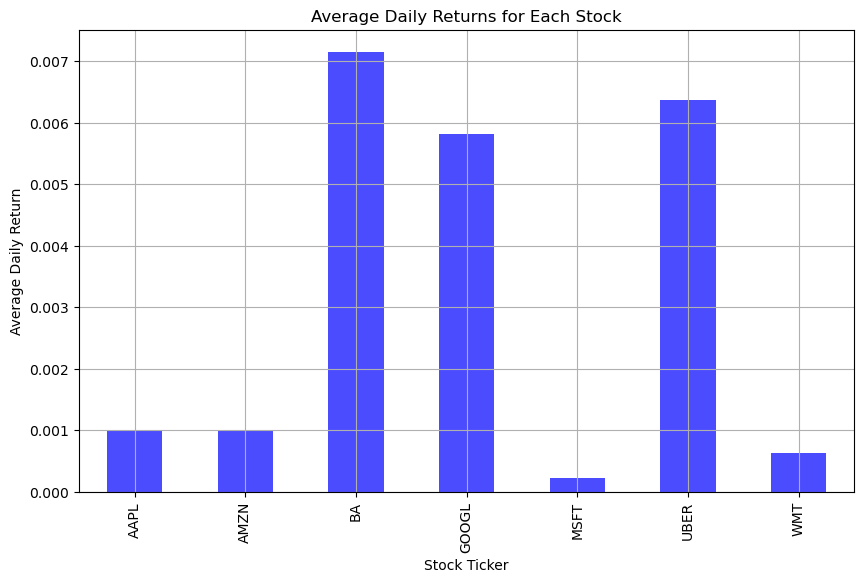

In [16]:

plt.figure(figsize=(10, 6))
average_daily_returns.plot(kind='bar', color='blue', alpha=0.7)

plt.xlabel("Stock Ticker")
plt.ylabel("Average Daily Return")
plt.title("Average Daily Returns for Each Stock")
plt.grid(True)
plt.show()

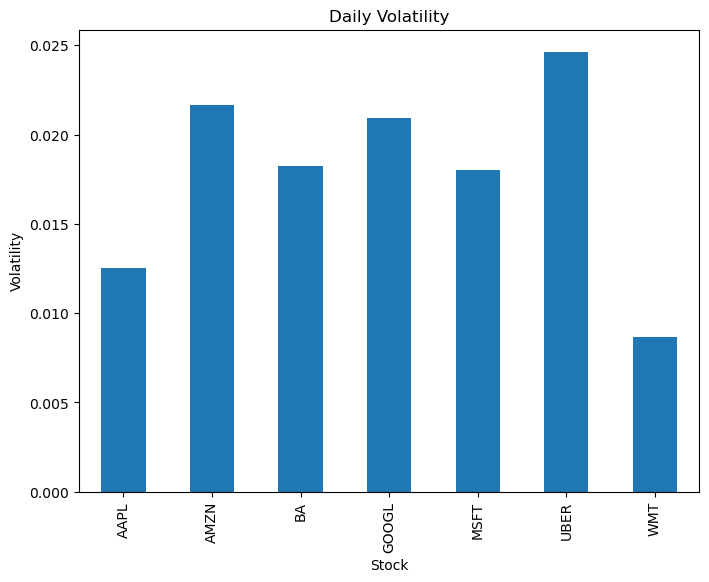

In [18]:

daily_volatility = data['Adj Close'].pct_change().std()


daily_volatility.plot(kind='bar', figsize=(8, 6))
plt.title("Daily Volatility")
plt.xlabel("Stock")
plt.ylabel("Volatility")
plt.show()

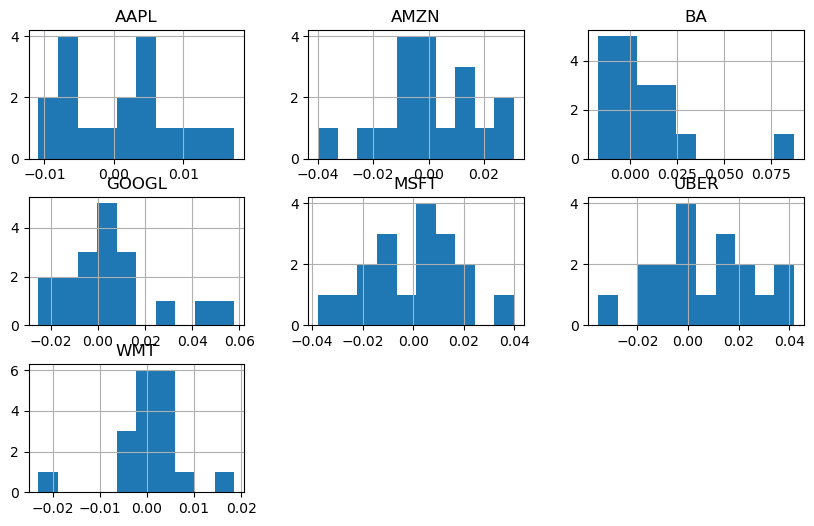

In [21]:

daily_returns.hist(bins=10, figsize=(10, 6))
plt.title("Daily Price Changes (Volatility)")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.legend(tickers)
plt.show()

In [22]:

annualized_returns = (1 + daily_returns.mean()) ** 252 - 1

In [23]:

print("Annualized Returns:")
print(annualized_returns)

Annualized Returns:
AAPL     0.284530
AMZN     0.281234
BA       5.026346
GOOGL    3.315879
MSFT     0.059783
UBER     3.959294
WMT      0.171968
dtype: float64


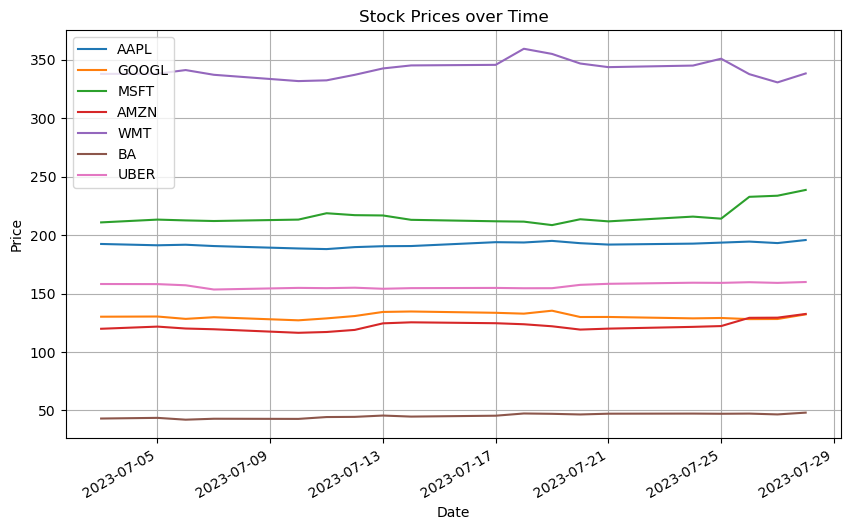

In [24]:

stock_data['Adj Close'].plot(figsize=(10, 6))

plt.title("Stock Prices over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(tickers)
plt.grid(True)
plt.show()

In [27]:

highest_return_stock = daily_returns.idxmax()


lowest_return_stock = daily_returns.idxmin()

# Display the results
print(f"The stock with the highest daily return is: {highest_return_stock}")
print(f"The stock with the lowest daily return is: {lowest_return_stock}")

The stock with the highest daily return is: AAPL    2023-07-17
AMZN    2023-07-28
BA      2023-07-26
GOOGL   2023-07-26
MSFT    2023-07-18
UBER    2023-07-18
WMT     2023-07-20
dtype: datetime64[ns]
The stock with the lowest daily return is: AAPL    2023-07-10
AMZN    2023-07-20
BA      2023-07-14
GOOGL   2023-07-10
MSFT    2023-07-26
UBER    2023-07-06
WMT     2023-07-07
dtype: datetime64[ns]


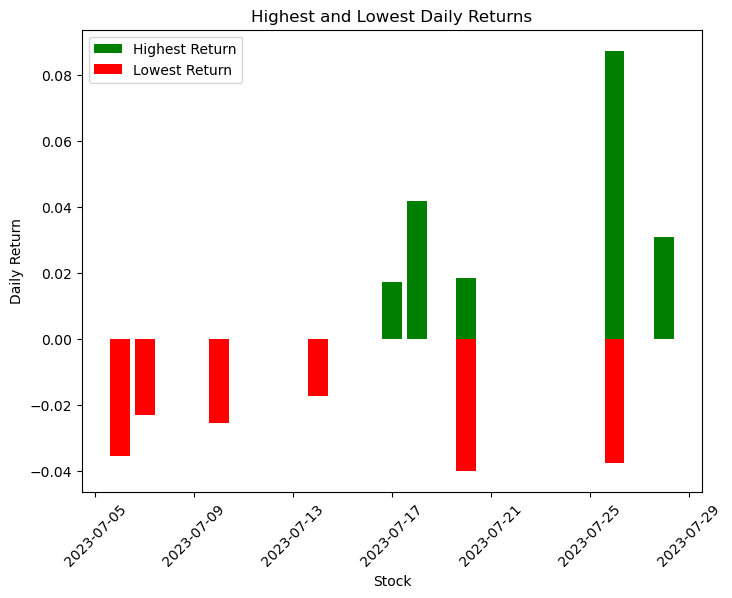

In [33]:

plt.figure(figsize=(8, 6))
plt.bar(highest_return_stock, daily_returns.max(), label='Highest Return', color='g')
plt.bar(lowest_return_stock, daily_returns.min(), label='Lowest Return', color='r')
plt.title("Highest and Lowest Daily Returns")
plt.xlabel("Stock")
plt.ylabel("Daily Return")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
#In this Stock market Project,
Summary: 
    
- We conducted an analysis of stock market data to gain insights into the performance of various stocks.
- The data was collected using Yahoo Finance API for selected companies based on US Stock Exhange.
- We performed data cleaning, preprocessing, and analysis using pandas and Matplotlib libraries. 
- We performed analysis to check the performance of different stocks, identify volatile stocks, average price, highest and daily returns and  
visualize the data.


Data Analysis:
1: Stocks included were 
Apple Inc. (AAPL), Microsoft Corporation (MSFT), Walmart Inc. (WMT), The Boeing Company (BA), Uber Technologies Inc. (UBER), Amazon.com, Inc.(AMZN) and Google.(GOOGL)

2: The coloumn included were:
- daily stock prices
- including open, high, low, close, adjusted close,
- trading volume.

3: We compared the performance of different stocks over the specified time period to identify
- Most volatile stocks.
- Comparing the performance of different stocks over a certain time period.
- Calculating and comparing different technical indicators like Moving Averages.

4: Findings
- Boeing Co and Google showed a consistent positive trends including a steady growth throughout the analyzed period. 
- Both these stocks seem promising for long-term investors.
- APPL: showed a good positive trends for few days.
- Uber: Uber displayed a higher volatility and price fluctuations.
- MSFT :Not a good stock to invest for short term investment. 
    
Conclsion:
    
The analysis gave us valuable insights into the stock market. 
Boeing Co and Google seem promising for long-term investors due to their consistent growth.
Uber in third position should also be considered to investors 
Investors can see different charts which will assist them making a calcuative decisions.
    


